<a href="https://colab.research.google.com/github/Sahil-Sidana/Density-Peaks-Clustering/blob/main/DPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pseudocode for identifying cluster centers in DPC using the product of local density and delta value:

# 1. Input:

# - Data points as a matrix or array (each row representing a point)
# - Cut-off distance "dc"
# - rho * delta threshold "rho_delta_threshold"

# 2. Calculate pairwise distances between all data points


# 3. Calculate local density for each data point

# - Choose a kernel function (in our case it is cut-off kernel method)
# - For each point i:
#   - Apply the kernel function to distances between i and other points, using dc
#   - Sum the kernel values to obtain local density rho[i]

# 4. Calculate delta values for each data point

# - For each point i:
# - Find the nearest neighbor with higher density than i (denoted as j)
# - Calculate delta[i] = distance(i, j)

# 5. Identify candidate cluster centers

# - For each point i:
# - If rho[i]* delta[i] > rho_delta_threshold:
# - Add i to a list of candidate cluster centers

# 6. Assign non center points to nearest cluster center

# 7. Plot the clusters


In [ ]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


Hypothesis 1: cluster centers are denser than their neighbors.
Thus, the density of each data instance can be defined, as shown
in Eq. (1):
ρi = χ(dij − dc)

Hypothesis 2: The distance between two center points is
anomalously large.

In [ ]:
class DPC:
    def __init__(self, dc, rho_delta_threshold):
        self.dc = dc
        self.rho_delta_threshold = rho_delta_threshold


    # Time Complexity: O(N*N)
    def calculate_pairwise_distances(self, X):
        n = len(X)
        dim = X.shape[1]
        # print(dim)
        distances = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
              if(i!=j):
                dist = 0
                for k in range(dim):
                  dist=dist+ (X.iloc[i,k]-X.iloc[j,k])**2
                distances[i][j] = math.sqrt(dist);
        return distances


    # Time Complexity: O(N*N)
    def calculate_local_density(self, X, distances):
        n = len(X)
        rho = np.zeros(n)
        for i in range(n):
          for j in range(n):
            # ρi = χ(dij − dc)
            if(distances[i][j]<=self.dc):
              rho[i]=rho[i]+1;
        return rho


    # Time Complexity: O(N*N)
    def calculate_delta(self, X, distances, rho):
        n = len(X)
        delta = np.zeros(n)
        for i in range(n):
            min_distance = np.inf
            for j in range(n):
                if rho[j] > rho[i]:
                  min_distance = min(min_distance, distances[i][j])

            if(min_distance!=np.inf):
              delta[i] = min_distance
            else:
              maxi = 0
              for j in range(n):
                maxi = max(maxi,distances[i][j])
              delta[i] = maxi

        return delta


    # Time Complexity: O(N)
    def identify_cluster_centers(self, X, distances, rho, delta):
        candidate_centers = []
        n = len(X)
        for i in range(n):
          if((rho[i] * delta[i])> self.rho_delta_threshold):
              candidate_centers.append(i)
        return candidate_centers


    # Time Complexity: O(N*(No of Clusters))
    def assign_clusters(self, X, cluster_centers,distances):
        clusters = [[] for i in range(len(cluster_centers))]  # Initialize clusters as a list of lists
        for i in range(len(X)):
            min_distance=np.inf
            min_center=np.inf
            for j in range(len(cluster_centers)):
              if(distances[i][cluster_centers[j]]<min_distance):
                min_distance=distances[i][cluster_centers[j]];
                min_center=j
            clusters[min_center].append(i)
        return clusters



    def plot_clusters(self, X, cluster_centers, clusters):
        plt.figure(figsize=(8, 8))
        for i, center_idx in enumerate(cluster_centers):
            center = X.iloc[center_idx]
            cluster_points = X.iloc[clusters[i]]
            plt.scatter(cluster_points[0], cluster_points[1], label=f'Cluster {i+1}')
            plt.scatter(center[0], center[1], color='black', marker='^', label=f'Cluster Center {i+1}')
        plt.title('DPC Clustering')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.legend()
        plt.show()


    def plot_graph(self,rho,delta,x):
      plt.figure(figsize=(10, 10))
      if(x==1):
        plt.scatter(range(len(rho)), rho, color='black', marker='o')
        plt.title('Rho values of each point')
        plt.xlabel('Data Point Index')
        plt.ylabel('Rho Value')
      elif (x==2):
        plt.scatter(range(len(delta)), delta, color='black', marker='o')
        plt.title('Delta values of each point')
        plt.xlabel('Data Point Index')
        plt.ylabel('Delta Value')
      else:
        plt.scatter(rho, delta, color='b', marker='o')
        plt.title('Delta vs Rho')
        plt.xlabel('Rho')
        plt.ylabel('Delta')
      plt.grid(True)
      plt.show()

In [ ]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.9f' % x)
X = pd.read_csv('fig2_panelB.dat', delimiter=' ', header=None)
# X=X.iloc[0:1000]

In [ ]:
dc = 0.03
rho_delta_threshold = 9
dpc = DPC(dc, rho_delta_threshold)
print("Dataset size: ",len(X),"\n");

print("Dataset: \n",X,"\n");

print("Cut off Distance threshold: ",dc,"\n");

print("rho * delta threshold: ",rho_delta_threshold,"\n");

Dataset size:  4000 

Dataset: 
                 0           1
0    -0.355166733 0.709648907
1    -0.355980426 0.709710836
2    -0.357984990 0.705306292
3    -0.354210407 0.708723843
4    -0.357727766 0.711061656
...           ...         ...
3995 -0.022585392 1.156054970
3996 -0.106172621 1.278485770
3997 -0.764840722 1.179749490
3998 -0.719843209 1.143175360
3999 -0.738615096 1.068238970

[4000 rows x 2 columns] 

Cut off Distance threshold:  0.03 

rho * delta threshold:  9 



In [ ]:
distances = dpc.calculate_pairwise_distances(X)

print("Euclidean distance between each pair of data point\n");
print("Distance Matrix:\n", distances,"\n")

Euclidean distance between each pair of data point

Distance Matrix:
 [[0.         0.00081605 0.00517696 ... 0.62356021 0.56651047 0.52499474]
 [0.00081605 0.         0.00483924 ... 0.6229792  0.56593959 0.52435838]
 [0.00517696 0.00483924 0.         ... 0.62500235 0.5680411  0.52592719]
 ...
 [0.62356021 0.6229792  0.62500235 ... 0.         0.05798658 0.11455296]
 [0.56651047 0.56593959 0.5680411  ... 0.05798658 0.         0.07725184]
 [0.52499474 0.52435838 0.52592719 ... 0.11455296 0.07725184 0.        ]] 



In [ ]:
rho = dpc.calculate_local_density(X, distances)
rho_df = pd.DataFrame(rho)
pd.set_option('display.float_format', lambda x: '{:.0f}'.format(x))
print("Rho of each point:\n", rho_df, "\n")

Rho of each point:
        0
0    220
1    217
2    221
3    224
4    209
...   ..
3995   1
3996   1
3997   1
3998   1
3999   1

[4000 rows x 1 columns] 



In [ ]:
delta = dpc.calculate_delta(X, distances, rho)
delta_df = pd.DataFrame(delta)
pd.set_option('display.float_format', lambda x: '%.9f' % x)
delta_str = delta_df.to_string(index=False)
print("Delta of each point:\n", delta_str, "\n")

Delta of each point:
           0
0.001330527
0.000816046
0.005091869
0.002857654
0.001692610
0.004476577
0.001663828
0.004724529
0.000961917
0.001562483
0.001154672
0.002864846
0.000673795
0.001871818
0.010833819
0.002257125
0.003442546
0.000876986
0.004133327
0.003043256
0.001333342
0.002722805
0.003053076
0.002858975
0.003053318
0.001659125
0.002754151
0.003574804
0.002696353
0.000683184
0.003506209
0.000528333
0.009285284
0.004377486
0.000827665
0.000830763
0.002698713
0.002251915
0.003350464
0.004451460
0.002362888
0.733863339
0.005467573
0.003014654
0.003815301
0.003145501
0.003836329
0.014720511
0.001915840
0.005529936
0.003191542
0.006282233
0.001129091
0.004179694
0.004561441
0.003053342
0.002166549
0.002450064
0.003884637
0.002583557
0.002664698
0.001444564
0.000868506
0.001613624
0.003326651
0.001151649
0.000553628
0.000818958
0.000469054
0.001136025
0.004398739
0.000924849
0.001346308
0.000662920
0.010332143
0.001254881
0.003706499
0.002890038
0.002260182
0.002459077
0.0021

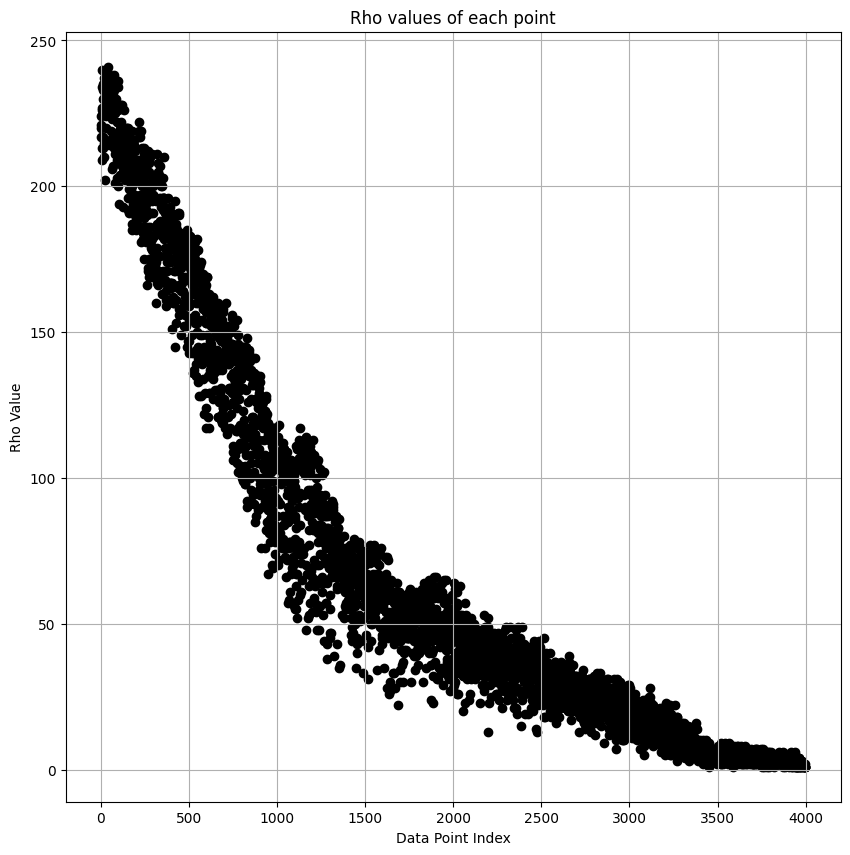

In [ ]:
dpc.plot_graph(rho,delta,1)

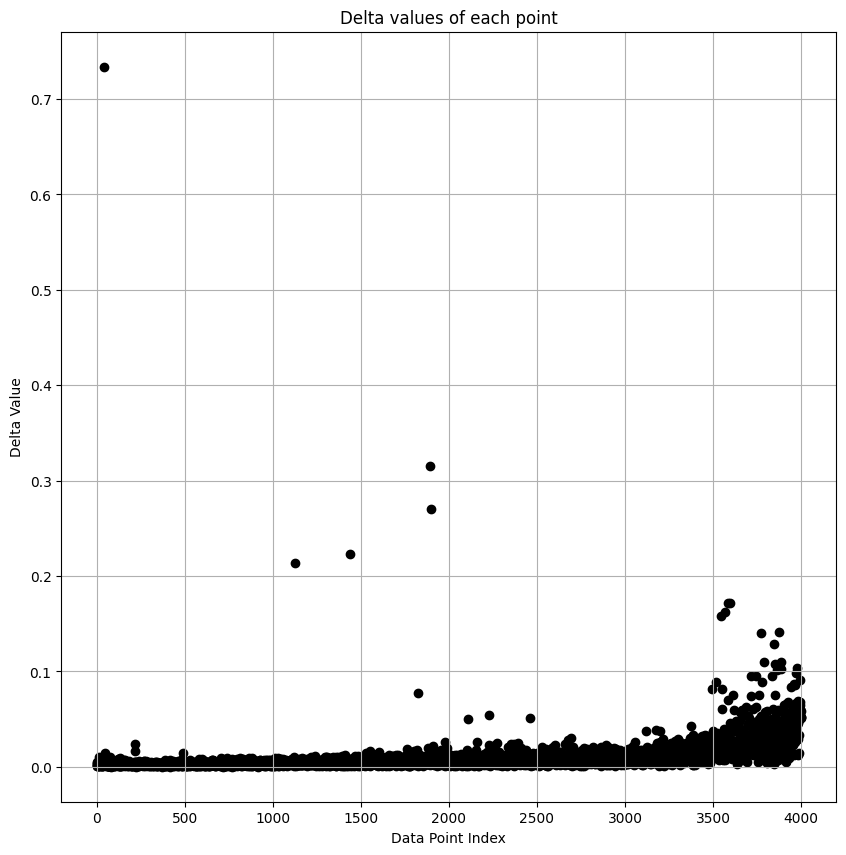

In [ ]:
dpc.plot_graph(rho,delta,2)

In [ ]:
cluster_centers = dpc.identify_cluster_centers(X, distances, rho, delta)

print("Cluster centers:\n", cluster_centers,"\n")

Cluster centers:
 [41, 1129, 1438, 1893, 1901] 



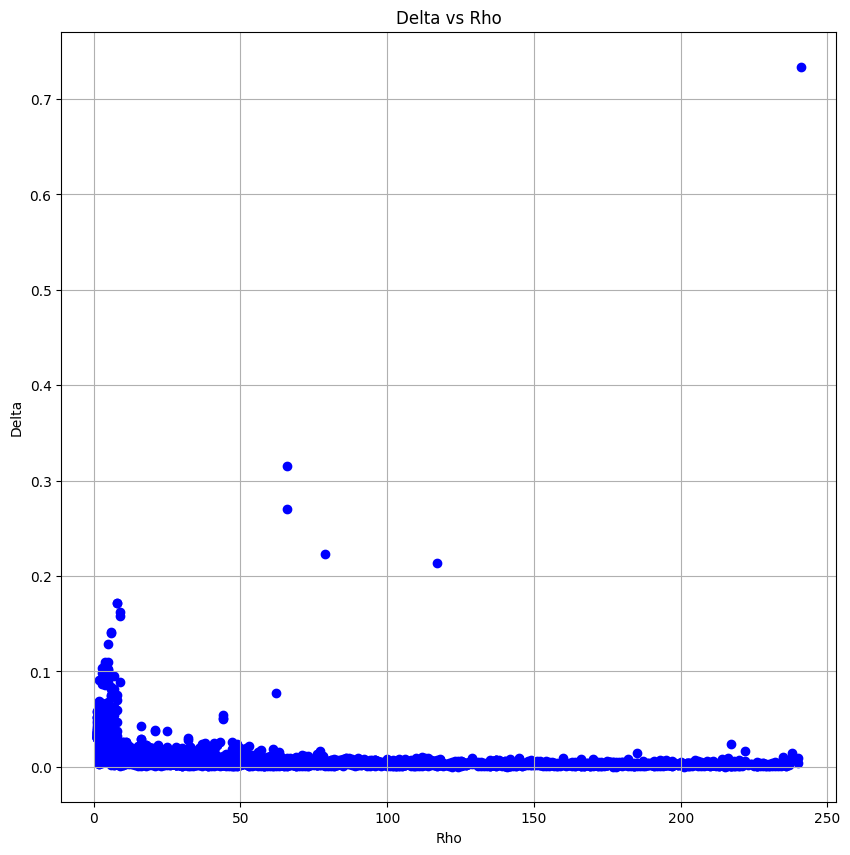

In [ ]:
dpc.plot_graph(rho,delta,3)

In [ ]:
clusters = dpc.assign_clusters(X, cluster_centers,distances)

print("Clusters: \n");

for i in range(len(clusters)):
    print(cluster_centers[i],": ", clusters[i],"\n");

Clusters: 

41 :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 2

Graph of Clusters:



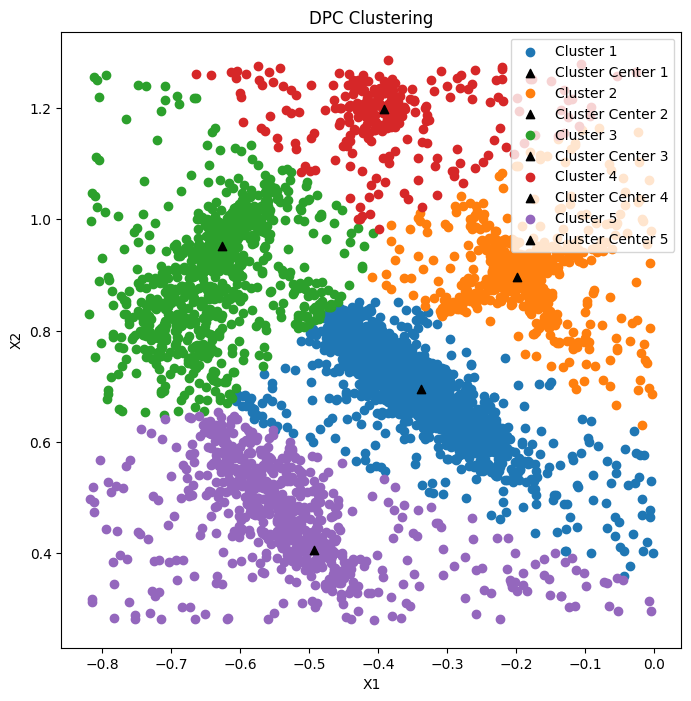

In [ ]:
print("Graph of Clusters:\n");

dpc.plot_clusters(X, cluster_centers, clusters)

In [ ]:
# fig2_panelC.dat

In [ ]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.9f' % x)
X = pd.read_csv('fig2_panelC.dat', delimiter=' ', header=None)
# X=X.iloc[0:1000]

In [ ]:
dc = 0.04
rho_delta_threshold = 9
dpc = DPC(dc, rho_delta_threshold)
print("Dataset size: ",len(X),"\n");

print("Dataset: \n",X,"\n");

print("Cut off Distance threshold: ",dc,"\n");

print("rho * delta threshold: ",rho_delta_threshold,"\n");

Dataset size:  1000 

Dataset: 
                0           1
0   -0.345765859 0.701011300
1   -0.348179638 0.696433246
2   -0.343588203 0.699235022
3   -0.355938196 0.698157787
4   -0.348647922 0.704416096
..           ...         ...
995 -0.104925454 0.640325487
996 -0.071584105 0.857232809
997 -0.591840923 1.261343720
998 -0.078190923 0.303113401
999 -0.761627316 0.384002388

[1000 rows x 2 columns] 

Cut off Distance threshold:  0.04 

rho * delta threshold:  9 



In [ ]:
distances = dpc.calculate_pairwise_distances(X)

print("Euclidean distance between each pair of data point\n");
print("Distance Matrix:\n", distances,"\n")

Euclidean distance between each pair of data point

Distance Matrix:
 [[0.         0.00517541 0.00281022 ... 0.61198477 0.47949878 0.52291051]
 [0.00517541 0.         0.00537878 ... 0.6152192  0.47706856 0.51822005]
 [0.00281022 0.00537878 0.         ... 0.61448808 0.47681029 0.52357264]
 ...
 [0.61198477 0.6152192  0.61448808 ... 0.         1.0872174  0.89361918]
 [0.47949878 0.47706856 0.47681029 ... 1.0872174  0.         0.68820661]
 [0.52291051 0.51822005 0.52357264 ... 0.89361918 0.68820661 0.        ]] 



In [ ]:
rho = dpc.calculate_local_density(X, distances)
rho_df = pd.DataFrame(rho)
pd.set_option('display.float_format', lambda x: '{:.0f}'.format(x))
print("Rho of each point:\n", rho_df, "\n")

Rho of each point:
       0
0   100
1   100
2   101
3    96
4    96
..   ..
995   1
996   1
997   1
998   1
999   1

[1000 rows x 1 columns] 



In [ ]:
delta = dpc.calculate_delta(X, distances, rho)
delta_df = pd.DataFrame(delta)
pd.set_option('display.float_format', lambda x: '%.9f' % x)
delta_str = delta_df.to_string(index=False)
# print("Delta of each point:\n", delta_str, "\n")

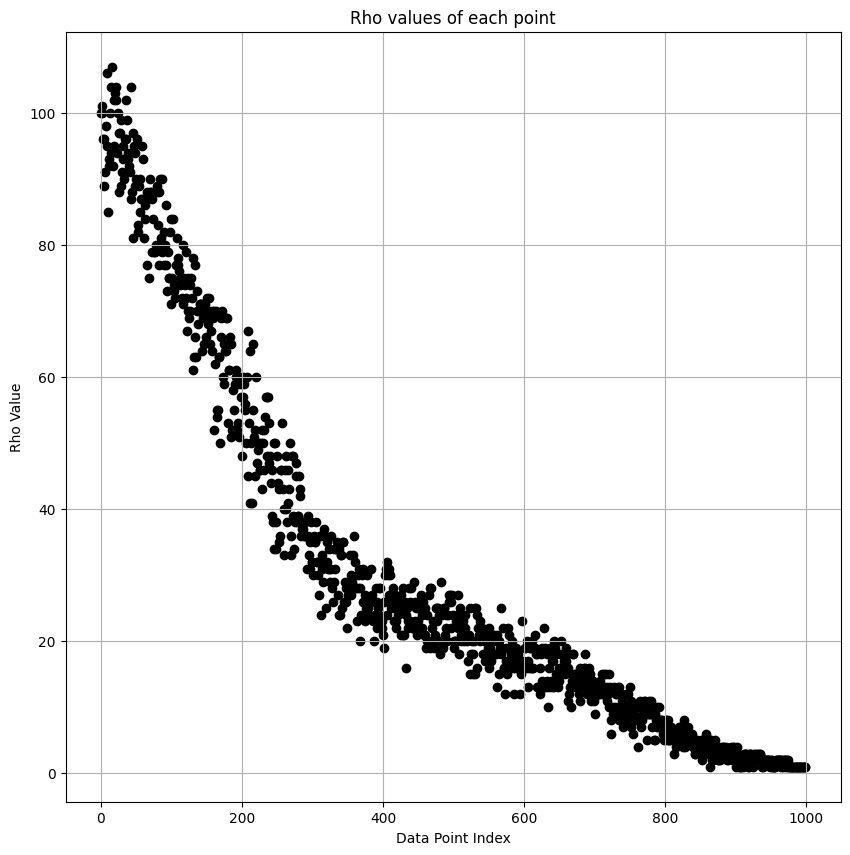

In [ ]:
dpc.plot_graph(rho,delta,1)

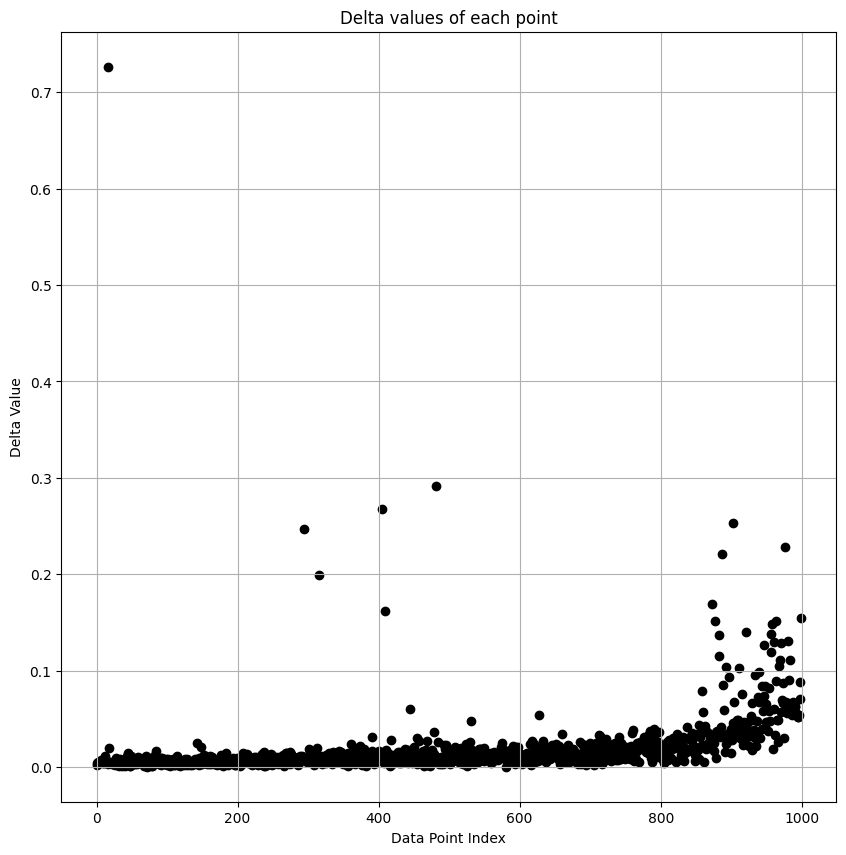

In [ ]:
dpc.plot_graph(rho,delta,2)

In [ ]:
cluster_centers = dpc.identify_cluster_centers(X, distances, rho, delta)

print("Cluster centers:\n", cluster_centers,"\n")

Cluster centers:
 [16, 294] 



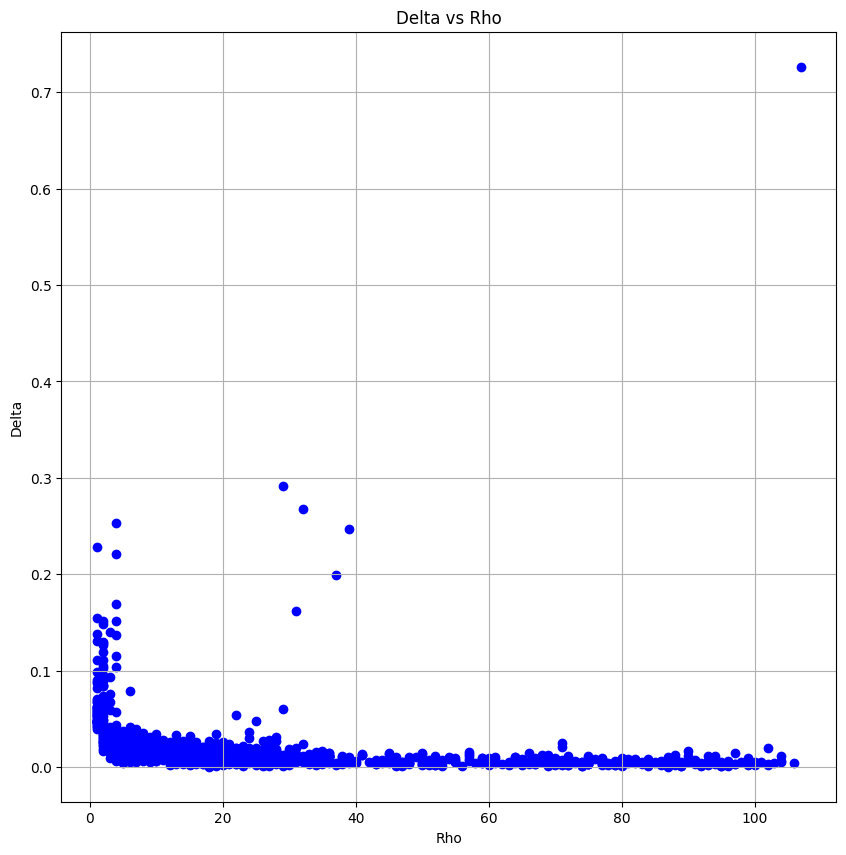

In [ ]:
dpc.plot_graph(rho,delta,3)

In [ ]:
clusters = dpc.assign_clusters(X, cluster_centers,distances)

print("Clusters: \n");

for i in range(len(clusters)):
    print(cluster_centers[i],": ", clusters[i],"\n");

Clusters: 

16 :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 2

Graph of Clusters:



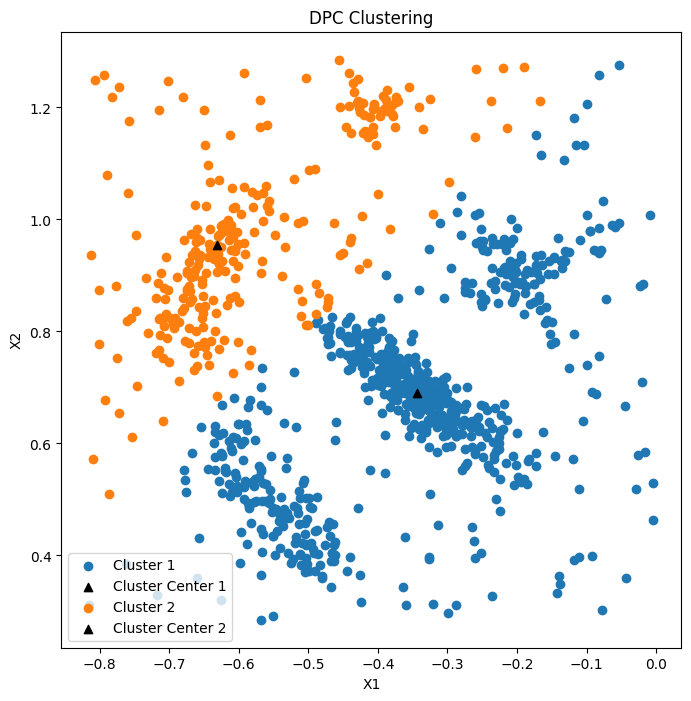

In [ ]:
print("Graph of Clusters:\n");

dpc.plot_clusters(X, cluster_centers, clusters)